The purpose of this notebook is to extract correlation values form the himalaya pipeline.
Using the Glasser ROIs

In [11]:
import os, glob
from os.path import join
import numpy as np
import pandas as pd
import seaborn as sns

from neuromaps.datasets import fetch_fslr
import numpy as np
from neuromaps.datasets import fetch_fsaverage
from surfplot import Plot
import nibabel as nib
from neuromaps.datasets import fetch_fslr
from surfplot import Plot


In [12]:
rois = {
    "V1": [1],             # Primary Visual
    "FFC": [18],           # Fusiform   
    "PHG": [126,155,127],  # ParaHippocampal Gyrus   
    "MT/MST": [2,23],      # Medial Superior Temporal Area, Middle Temporal Area
    "LOC": [140,141,157,156,159,2,23],
    "pSTS": [28,139],
    "TPJ": [149,150,151],  # Area TemporoParietoOccipital	Junction 1, 2, 3
    "AIP": [117, 116, 148, 147], # Anterior Intraparietal "PF": [ # PFT, PF, PF
    "SM": [8,9,51,52,53],           # 8: Primary Motor Cortex, Primary	Sensory	Cortex
    "vPM": [78,80] ,       # 6r, IFJP, 43, 6v
        }

In [8]:
def plot_roi(roi_name, lh_labels, rh_labels, rois, surfaces):
    # roi_name = "TPJ"
    lh, rh = surfaces
    p = Plot(surf_lh=lh, surf_rh=rh, size=(1000, 200), zoom=1.2, layout='row', views=['lateral', 'medial', 'ventral'], mirror_views=True)
    # fig = p.build()
    lh_roi_map = np.full(lh_labels.shape, np.nan)
    lh_roi_map[np.in1d(lh_labels, rois[roi_name])] = 1

    rh_roi_map = np.full(rh_labels.shape, np.nan)
    rh_roi_map[np.in1d(rh_labels, rois[roi_name])] = 1
    # plot_roi(lh_roi_map, rh_roi_map, roi_name, 'Reds')
    p.add_layer({'left': lh_roi_map, 'right': rh_roi_map}, cmap='YlOrRd_r', cbar=False)
    fig = p.build()
    fig.show()

In [13]:
main_dir = '/Volumes/life-encoding'
subjects = ['sub-rid000001', 'sub-rid000005', 'sub-rid000006',
            'sub-rid000009', 'sub-rid000012', 'sub-rid000014',
            'sub-rid000017', 'sub-rid000019', 'sub-rid000024',
            'sub-rid000027', 'sub-rid000031', 'sub-rid000032',
            'sub-rid000033', 'sub-rid000034', 'sub-rid000036',
            'sub-rid000037', 'sub-rid000038', 'sub-rid000041']
runs = [1,2,3,4]
hemis = ['lh', 'rh']
features = ['bg', 'agents', 'actions']
encoding_dir = join(main_dir, 'results/himalaya/moten/ha_common_pca-40')
isc_dir = join(main_dir, 'scripts/isc/lowerbound')

In [7]:
feature = 'bg'; sub= 'sub-rid000001'; run = 1; hemi = 'lh'; roi_name = 'MT/MST'
fname_pattern = f'{feature}-r_pca-40_align-ha_common_{sub}_run-{run}_hemi-{hemi}.npy'
data = np.load(join(encoding_dir, fname_pattern))

In [8]:
data.shape

(1, 40962)

## load MMP1

In [14]:
lh_labels, lh_ctab, lh_names= nib.freesurfer.io.read_annot('/Users/h/Documents/projects_local/life-encoding/scripts/HCP-MMP/lh.HCP_MMP1.fsaverage6.annot')
rh_labels, rh_ctab, rh_names= nib.freesurfer.io.read_annot('/Users/h/Documents/projects_local/life-encoding/scripts/HCP-MMP/rh.HCP_MMP1.fsaverage6.annot')

In [7]:
# lh_roi_map = np.full(lh_labels.shape, False)
# roi_name = 'TPJ'
# lh_roi_map[np.in1d(lh_labels, rois[roi_name])] = True

In [ ]:
# np.mean(data[:, lh_roi_map], axis=1)

array([0.08245992])

## compile results (correlation)

In [10]:
results = {
    "encoding performance (r)":[],
    "ROI":[],
    "subject":[],
    "hemisphere": [],
    "features": [],
    "run": []
           }


for subject in subjects:
    for hemi in hemis:
        for run in runs:
            for feature in features:
                for roi_name in rois:
                    fname_pattern = f'{feature}-r_pca-40_align-ha_common_{subject}_run-{run}_hemi-{hemi}.npy'
                    data = np.load(join(encoding_dir, fname_pattern))
                    if hemi == 'lh':
                        labels = lh_labels
                    elif hemi == 'rh':
                        labels = rh_labels
                    roi_map = np.full(labels.shape, False)
                    roi_map[np.in1d(labels, rois[roi_name])] = True

                    results['encoding performance (r)'].append(np.mean(data[0, roi_map])) 
                    results['ROI'].append(roi_name)
                    results['subject'].append(subject)
                    results['hemisphere'].append(hemi)
                    results['features'].append(feature)
                    results['run'].append(str(run))
            print(f"finished loading results for {subject}, {hemi}, {run}")


finished loading results for sub-rid000001, lh, 1
finished loading results for sub-rid000001, lh, 2
finished loading results for sub-rid000001, lh, 3
finished loading results for sub-rid000001, lh, 4
finished loading results for sub-rid000001, rh, 1
finished loading results for sub-rid000001, rh, 2
finished loading results for sub-rid000001, rh, 3
finished loading results for sub-rid000001, rh, 4
finished loading results for sub-rid000005, lh, 1
finished loading results for sub-rid000005, lh, 2
finished loading results for sub-rid000005, lh, 3
finished loading results for sub-rid000005, lh, 4
finished loading results for sub-rid000005, rh, 1
finished loading results for sub-rid000005, rh, 2
finished loading results for sub-rid000005, rh, 3
finished loading results for sub-rid000005, rh, 4
finished loading results for sub-rid000006, lh, 1
finished loading results for sub-rid000006, lh, 2
finished loading results for sub-rid000006, lh, 3
finished loading results for sub-rid000006, lh, 4


In [13]:
results_df = pd.DataFrame(results)
results_df.head()

,encoding performance (r),ROI,subject,hemisphere,features,run
0,0.013380,PHG,sub-rid000001,lh,bg,1
1,0.022987,V1,sub-rid000001,lh,bg,1
2,-0.008874,SM,sub-rid000001,lh,bg,1
3,0.082460,MT/MST,sub-rid000001,lh,bg,1
4,0.061577,LOC,sub-rid000001,lh,bg,1
...,...,...,...,...,...,...
4315,0.021953,FFC,sub-rid000041,rh,actions,4
4316,0.013590,TPJ,sub-rid000041,rh,actions,4
4317,0.010100,pSTS,sub-rid000041,rh,actions,4
4318,0.039084,AIP,sub-rid000041,rh,actions,4


In [15]:
# results_df.to_csv()

In [17]:
results_df[results_df['features'] == 'actions']

,encoding performance (r),ROI,subject,hemisphere,features,run
20,-0.040762,PHG,sub-rid000001,lh,actions,1
21,0.004506,V1,sub-rid000001,lh,actions,1
22,0.043157,SM,sub-rid000001,lh,actions,1
23,-0.004526,MT/MST,sub-rid000001,lh,actions,1
24,0.036587,LOC,sub-rid000001,lh,actions,1
...,...,...,...,...,...,...
4315,0.021953,FFC,sub-rid000041,rh,actions,4
4316,0.013590,TPJ,sub-rid000041,rh,actions,4
4317,0.010100,pSTS,sub-rid000041,rh,actions,4
4318,0.039084,AIP,sub-rid000041,rh,actions,4


<Axes: xlabel='ROI', ylabel='encoding performance (r)'>

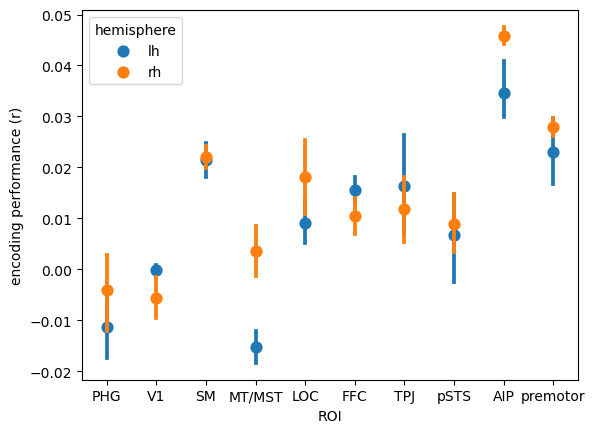

In [18]:
sns.pointplot(x="ROI", 
              y="encoding performance (r)", 
              hue="hemisphere",
              data=results_df[results_df['features'] == 'actions'],
              join=False)

<Axes: xlabel='ROI', ylabel='encoding performance (r)'>

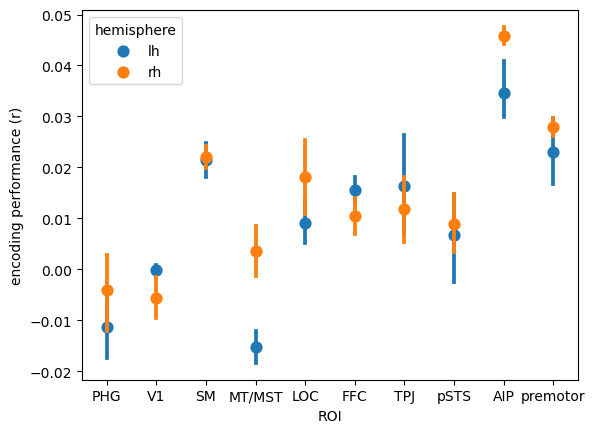

In [ ]:
sns.pointplot(x="ROI", 
              y="encoding performance (r)", 
              hue="hemisphere",
              data=results_df[results_df['features'] == 'actions'],
              join=False)

### barplot: actions

<Axes: xlabel='ROI', ylabel='encoding performance (r)'>

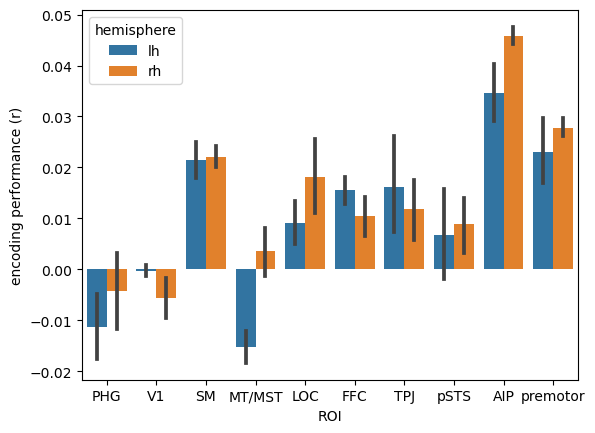

In [19]:
sns.barplot(x="ROI", 
              y="encoding performance (r)", 
              hue="hemisphere",
              data=results_df[results_df['features'] == 'actions']
            )

### barplot: bg

<Axes: xlabel='ROI', ylabel='encoding performance (r)'>

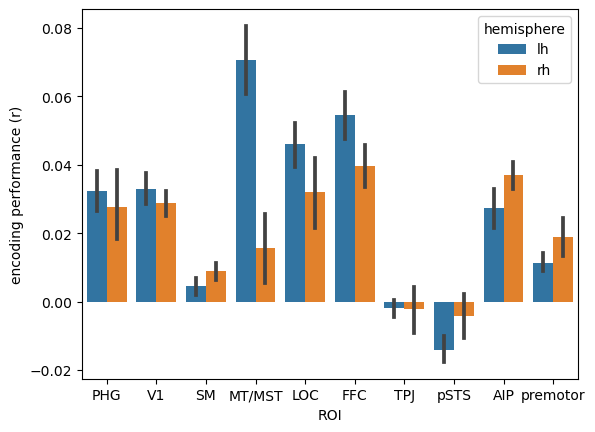

In [21]:
sns.barplot(x="ROI", 
              y="encoding performance (r)", 
              hue="hemisphere",
              data=results_df[results_df['features'] == 'bg']
            )

### barplot: agents

<Axes: xlabel='ROI', ylabel='encoding performance (r)'>

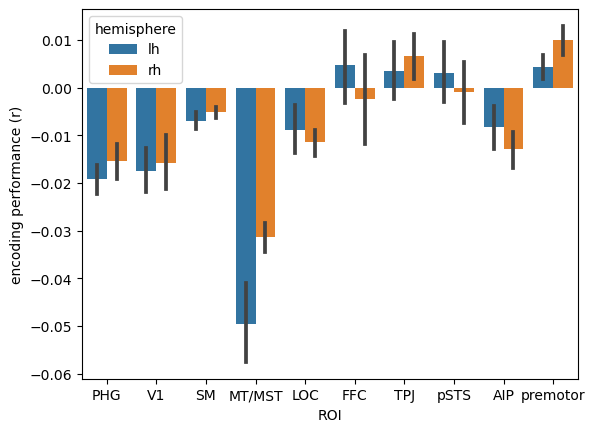

In [22]:
sns.barplot(x="ROI", 
              y="encoding performance (r)", 
              hue="hemisphere",
              data=results_df[results_df['features'] == 'agents']
            )

In [24]:
sns.barplot(x="ROI", 
              y="encoding performance (r)", 
              hue="hemisphere",
              data=results_df[results_df['features'] == 'motion']
            )

ValueError: min() arg is an empty sequence

### barplot

<Axes: xlabel='ROI', ylabel='encoding performance (r)'>

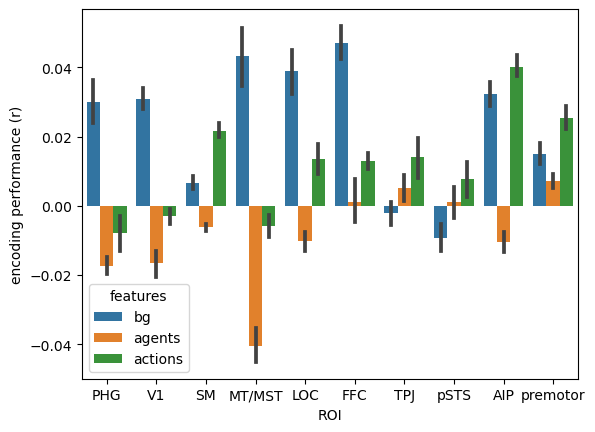

In [20]:
#hue = features
sns.barplot(x="ROI", 
              y="encoding performance (r)", 
              hue="features",
              data=results_df
            )

# compile results (ISC)

In [45]:
isc = {
    "ISC lowerbound performance (r)":[],
    "ROI":[],
    "subject":[],
    "hemisphere": [],
    # "features": [],
    "run": []
           }


for subject in subjects:
    for hemi in hemis:
        for run in runs:
            # for feature in features:
            for roi_name in rois:
                fname_pattern = f'subjectwise-ISC_align-ha_common_hemi-{hemi}_run-{run:02d}_{subject}.npy'#f'{feature}-r_pca-40_align-ha_common_{sub}_run-{run}_hemi-{hemi}.npy'
                data = np.load(join(isc_dir, fname_pattern))
                if hemi == 'lh':
                    labels = lh_labels
                elif hemi == 'rh':
                    labels = rh_labels
                roi_map = np.full(labels.shape, False)
                roi_map[np.in1d(labels, rois[roi_name])] = True

                isc['ISC lowerbound performance (r)'].append(np.mean(data[0, roi_map])) 
                isc['ROI'].append(roi_name)
                isc['subject'].append(subject)
                isc['hemisphere'].append(hemi)
                # isc['features'].append(feature)
                isc['run'].append(str(run))
        print(f"finished loading results for {subject}, {hemi}, {run}")


finished loading results for sub-rid000001, lh, 4
finished loading results for sub-rid000001, rh, 4
finished loading results for sub-rid000005, lh, 4
finished loading results for sub-rid000005, rh, 4
finished loading results for sub-rid000006, lh, 4
finished loading results for sub-rid000006, rh, 4
finished loading results for sub-rid000009, lh, 4
finished loading results for sub-rid000009, rh, 4
finished loading results for sub-rid000012, lh, 4
finished loading results for sub-rid000012, rh, 4
finished loading results for sub-rid000014, lh, 4
finished loading results for sub-rid000014, rh, 4
finished loading results for sub-rid000017, lh, 4
finished loading results for sub-rid000017, rh, 4
finished loading results for sub-rid000019, lh, 4
finished loading results for sub-rid000019, rh, 4
finished loading results for sub-rid000024, lh, 4
finished loading results for sub-rid000024, rh, 4
finished loading results for sub-rid000027, lh, 4
finished loading results for sub-rid000027, rh, 4


In [46]:
isc_df = pd.DataFrame(isc)
isc_df

,ISC lowerbound performance (r),ROI,subject,hemisphere,run
0,0.555601,V1,sub-rid000001,lh,1
1,0.567080,FFC,sub-rid000001,lh,1
2,0.365155,PHG,sub-rid000001,lh,1
3,0.639383,MT/MST,sub-rid000001,lh,1
4,0.585407,LOC,sub-rid000001,lh,1
...,...,...,...,...,...
1435,0.484971,pSTS,sub-rid000041,rh,4
1436,0.317024,TPJ,sub-rid000041,rh,4
1437,0.301091,AIP,sub-rid000041,rh,4
1438,0.173826,SM,sub-rid000041,rh,4


## ISC lowerbound

[Text(0.5, 1.0, 'ISC lowerbound')]

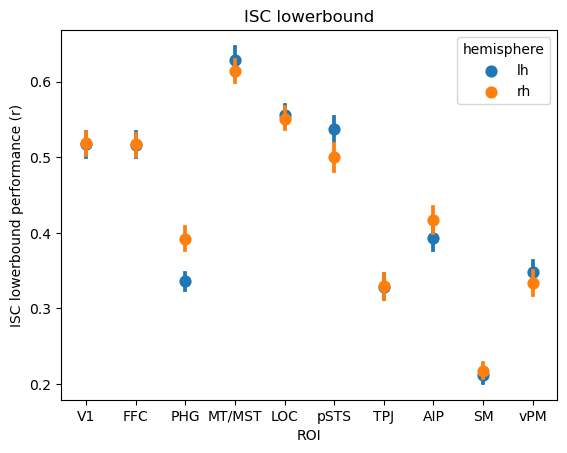

In [47]:
sns.pointplot(x="ROI", 
              y="ISC lowerbound performance (r)", 
              hue="hemisphere",
              data=isc_df,
              join=False).set(title='ISC lowerbound')

[Text(0.5, 1.0, 'ISC lowerbound')]

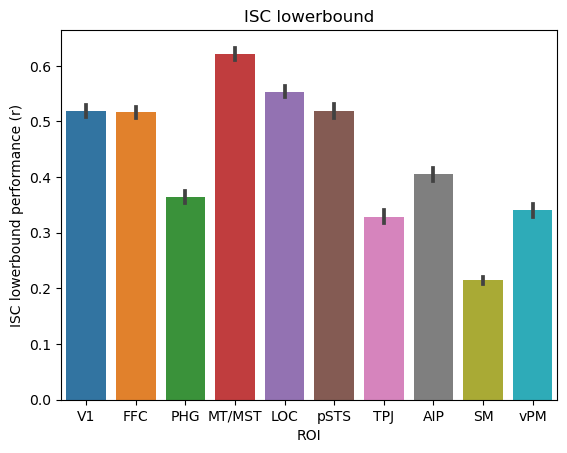

In [49]:
#hue = features
sns.barplot(x="ROI", 
              y="ISC lowerbound performance (r)", 
              # hue="features",
              data=isc_df
            ).set(title='ISC lowerbound')

# compile ISC upperbound

In [36]:
isc_upperdir = join(main_dir, 'scripts/isc/upperbound')

In [52]:
isc_upper = {
    "ISC upperbound performance (r)":[],
    "ROI":[],
    "subject":[],
    "hemisphere": [],
    "run": []
           }


for subject in subjects:
    for hemi in hemis:
        for run in runs:
            # for feature in features:
            for roi_name in rois:
                fname_pattern = f'subjectwise-ISCupperbound_align-ha_common_hemi-{hemi}_run-{run:02d}_{subject}.npy'#f'{feature}-r_pca-40_align-ha_common_{sub}_run-{run}_hemi-{hemi}.npy'
                data = np.load(join(isc_upperdir, fname_pattern))
                if hemi == 'lh':
                    labels = lh_labels
                elif hemi == 'rh':
                    labels = rh_labels
                roi_map = np.full(labels.shape, False)
                roi_map[np.in1d(labels, rois[roi_name])] = True

                isc_upper['ISC upperbound performance (r)'].append(np.mean(data[0, roi_map])) 
                isc_upper['ROI'].append(roi_name)
                isc_upper['subject'].append(subject)
                isc_upper['hemisphere'].append(hemi)
                isc_upper['run'].append(str(run))
        print(f"finished loading results for {subject}, {hemi}, {run}")


finished loading results for sub-rid000001, lh, 4
finished loading results for sub-rid000001, rh, 4
finished loading results for sub-rid000005, lh, 4
finished loading results for sub-rid000005, rh, 4
finished loading results for sub-rid000006, lh, 4
finished loading results for sub-rid000006, rh, 4
finished loading results for sub-rid000009, lh, 4
finished loading results for sub-rid000009, rh, 4
finished loading results for sub-rid000012, lh, 4
finished loading results for sub-rid000012, rh, 4
finished loading results for sub-rid000014, lh, 4
finished loading results for sub-rid000014, rh, 4
finished loading results for sub-rid000017, lh, 4
finished loading results for sub-rid000017, rh, 4
finished loading results for sub-rid000019, lh, 4
finished loading results for sub-rid000019, rh, 4
finished loading results for sub-rid000024, lh, 4
finished loading results for sub-rid000024, rh, 4
finished loading results for sub-rid000027, lh, 4
finished loading results for sub-rid000027, rh, 4


In [53]:
isc_upperdf = pd.DataFrame(isc_upper)
isc_upperdf.head()

,ISC upperbound performance (r),ROI,subject,hemisphere,run
0,0.620101,V1,sub-rid000001,lh,1
1,0.629972,FFC,sub-rid000001,lh,1
2,0.477959,PHG,sub-rid000001,lh,1
3,0.685568,MT/MST,sub-rid000001,lh,1
4,0.643213,LOC,sub-rid000001,lh,1


[Text(0.5, 1.0, 'ISC upperbound')]

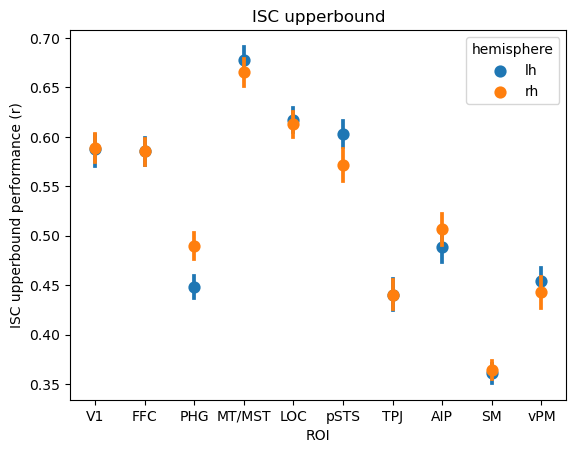

In [54]:
sns.pointplot(x="ROI", 
              y="ISC upperbound performance (r)", 
              hue="hemisphere",
              data=isc_upperdf,
              join=False).set(title='ISC upperbound')

[Text(0.5, 1.0, 'ISC upperbound')]

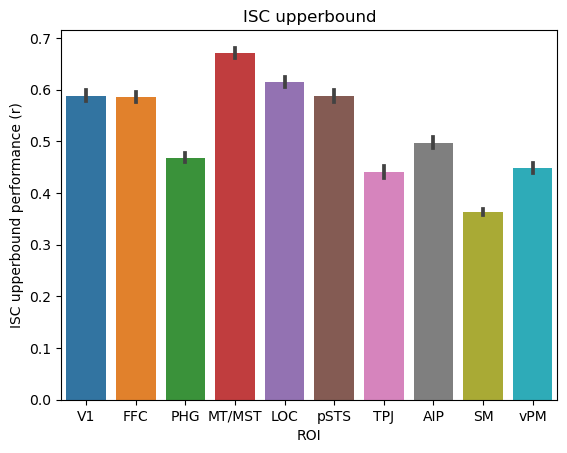

In [55]:
#hue = features
sns.barplot(x="ROI", 
              y="ISC upperbound performance (r)", 
              # hue="features",
              data=isc_upperdf
            ).set(title='ISC upperbound')